In [446]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import re

In [317]:
fto = '/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/15.TXT' #  File to Open

l=[]
l.extend(range(0,254))
df = pd.read_csv(fto, names=l, header=None, low_memory=False)
#df['time'] = df.index * (1/123)
#df = df[:-5]
#df[0] = df[0].astype(float)

In [291]:
df.loc[df[0]=='$DOS']
df
#df.loc[df[9]<8]#.loc[:,8:]
#df.loc[7965:]

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,$DOS,SPACEDOS03,S04,4275397696,256,1290c00806a20090644aa000a0000042,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$HIST,0,4275397711,1623,3,4110,55047.0,4733.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,$HIST,1,4275397727,1581,3,4112,55211.0,4603.0,22.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,$HIST,2,4275397743,1560,4,3889,55061.0,4970.0,40.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,$HIST,3,4275397759,1853,5,3987,52078.0,6828.0,296.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,$HIST,10996,4275576964,1552,1,2078,55020.0,6824.0,46.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10998,$HIST,10997,4275576981,1649,0,2000,54862.0,6957.0,51.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10999,$HIST,10998,4275576998,1561,0,2041,55117.0,6761.0,38.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11000,$HIST,10999,4275577014,1569,2,2042,55064.0,6809.0,33.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


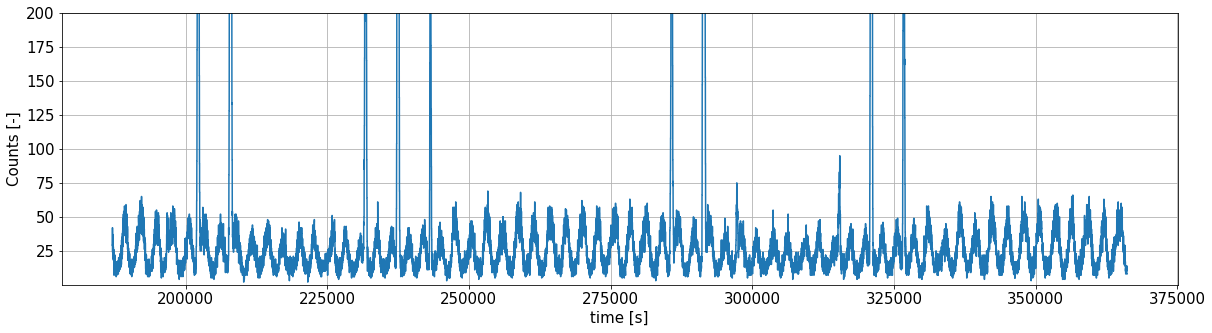

In [318]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

df = df.loc[df[0]=='$HIST'].copy()
df[2] = pd.to_numeric(df[2], errors='coerce')
df['sum'] = df.iloc[:,10:253].sum(axis=1)
df['mean'] = df['sum'].rolling(30).mean()

plt.plot(df[2]-4275747888,df['sum'], drawstyle='steps-mid')
#plt.plot(df['sum'], drawstyle='steps-mid')
#plt.plot(df['mean'], drawstyle='steps-mid')
#plt.xlim(39,58)
#plt.xlim(39,42)
plt.ylim(0.0016,200)
plt.xlabel('time [s]')
plt.ylabel('Counts [-]')
plt.grid()

In [311]:
fto = '/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-002_0x15/13.TXT' #  File to Open

l=[]
l.extend(range(0,254))
df2 = pd.read_csv(fto, names=l, header=None, low_memory=False)
#df['time'] = df.index * (1/123)
#df = df[:-5]
#df[0] = df[0].astype(float)

In [305]:
df2.loc[df2[0]=='$DOS']
df2
df2.loc[df2[9]>5]#.loc[:,8:]


,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
9965,$HIST,9965,4275744681,787,55,43705,20712,241,5,6,...,0,0,0,0,0,0,0,0,0,0
9966,$HIST,9966,4275744697,738,49,43853,20644,222,8,10,...,0,0,0,0,0,0,0,0,0,0
9969,$HIST,9969,4275744747,758,64,43677,20807,205,3,7,...,0,0,0,0,0,0,0,0,0,0
9979,$HIST,9979,4275744912,796,38,43577,20879,219,5,6,...,0,0,0,0,0,0,0,0,0,0
9980,$HIST,9980,4275744929,823,48,43979,20469,183,3,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,$HIST,10996,4275761732,743,56,44448,20050,182,11,12,...,0,0,0,0,0,0,0,0,0,0
10997,$HIST,10997,4275761748,772,67,44260,20184,200,16,8,...,0,0,0,0,0,0,0,0,0,0
10998,$HIST,10998,4275761765,787,58,44195,20238,194,8,14,...,0,0,0,0,0,0,0,0,0,0
10999,$HIST,10999,4275761781,840,52,43249,21129,221,11,8,...,0,0,0,0,0,0,0,0,0,0


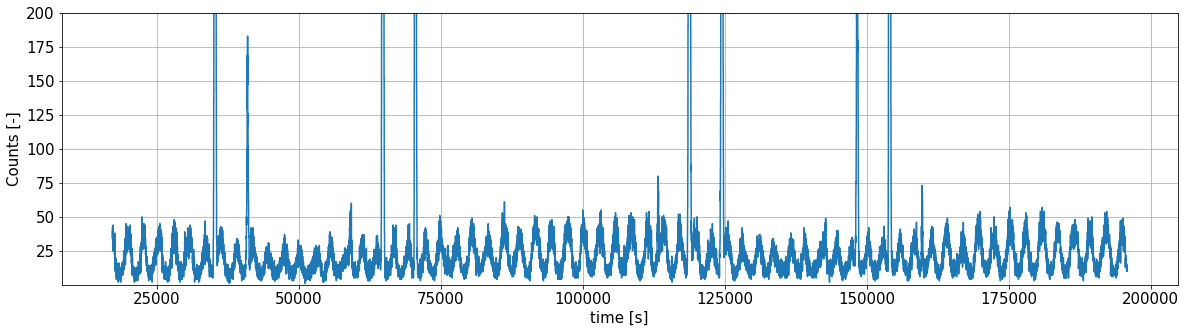

In [312]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

df2 = df2.loc[df2[0]=='$HIST'].copy()
df2[2] = pd.to_numeric(df2[2], errors='coerce')
df2['sum'] = df2.iloc[:,10:253].sum(axis=1)
df2['mean'] = df2['sum'].rolling(30).mean()

plt.plot(df2[2]-4275744648,df2['sum'], drawstyle='steps-mid')
#plt.plot(df2['sum'], drawstyle='steps-mid')
#plt.plot(df['mean'], drawstyle='steps-mid')
#plt.xlim(39,58)
#plt.xlim(39,42)
plt.ylim(0.0016,200)
plt.xlabel('time [s]')
plt.ylabel('Counts [-]')
plt.grid()

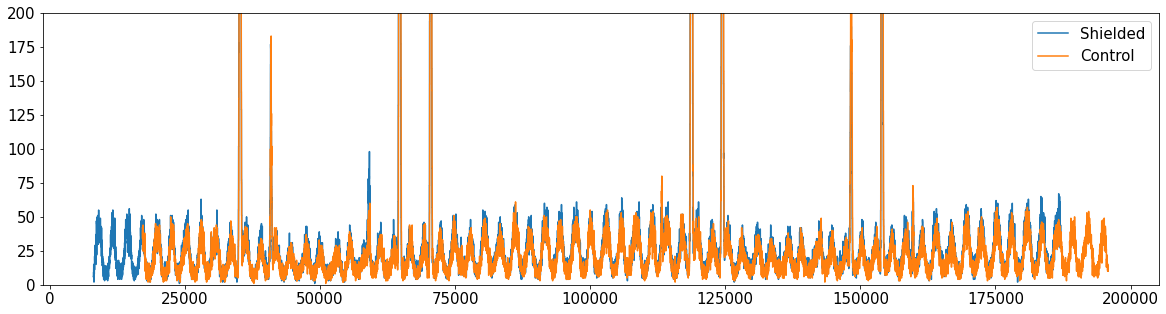

In [316]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df[2]-4275747888,df['sum'], drawstyle='steps-mid', label='Shielded')
plt.plot(df2[2]-4275744648,df2['sum'], drawstyle='steps-mid', label='Control')
plt.ylim(0,200)

plt.legend(loc=1)

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

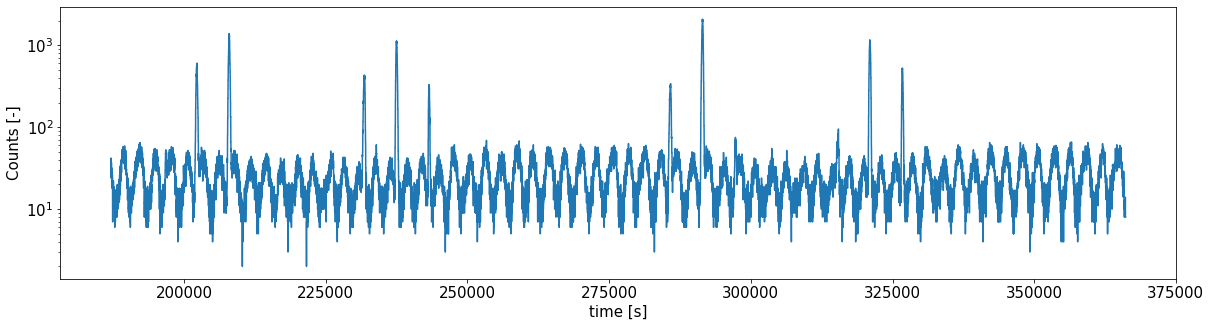

In [439]:
fto = '/storage/experiments/2024/03_ISS_SPACEDOS03/AX2-MSPD-001_Shielded_0x42/15.TXT' #  File to Open

l=[]
l.extend(range(0,254))
df = pd.read_csv(fto, names=l, header=None, low_memory=False)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

df = df.loc[df[0]=='$HIST'].copy()
df[2] = pd.to_numeric(df[2], errors='coerce')
df['sum'] = df.iloc[:,10:253].sum(axis=1)
df['mean'] = df['sum'].rolling(30).mean()

plt.plot(df[2]-4275747888,df['sum'], drawstyle='steps-mid')
plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel('Counts [-]')
plt.grid

(0.04, 200)

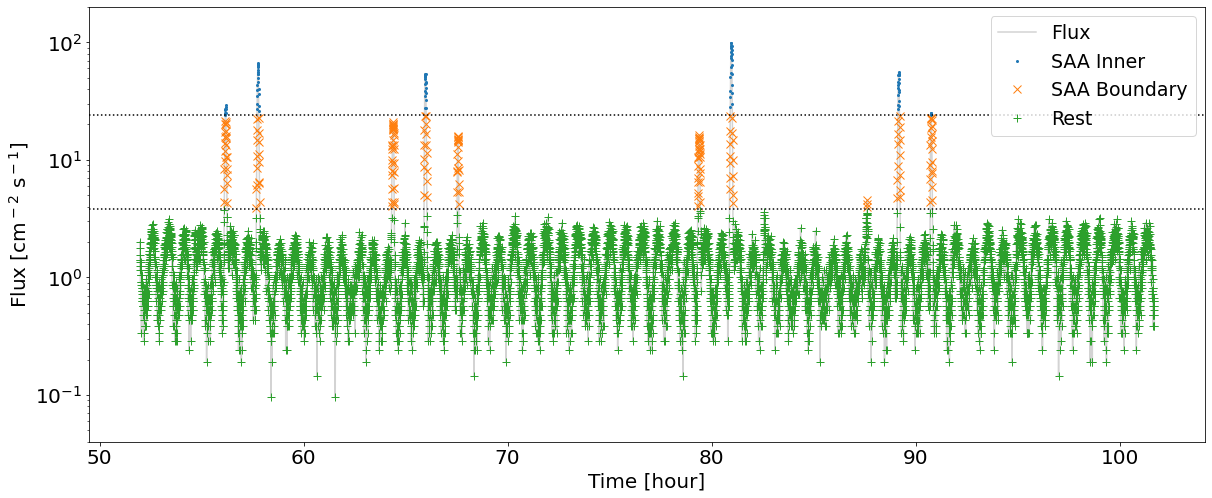

In [440]:
plt.figure(figsize=(20,8))
matplotlib.rcParams.update({'font.size': 20})

rcc = df.copy()
#rcc['time'] = pd.to_datetime(rcc.index * 11, unit='s')
rcc['time'] = (rcc[2]-4275747888) /60/60
rcc.set_index('time', inplace=True, drop=False)

plt.plot(rcc['sum']/10.4/2, c='lightgray', label='Flux')
plt.yscale('log')
plt.plot(rcc.loc[(rcc['sum']>500) & (rcc['sum']<10000)]['sum']/10.4/2, ms=4, marker='.', linestyle='', label='SAA Inner')
plt.plot(rcc.loc[(rcc['sum']>80) & (rcc['sum']<500)]['sum']/10.4/2, ms=8, marker='x', linestyle='', label='SAA Boundary')
plt.plot(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['sum']/10.4/2, ms=8, marker='+', linestyle='', label='Rest')

plt.axhline(y = 500/10.4/2, color = 'black', linestyle = ':')
plt.axhline(y = 80/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 13/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 10/10.4/2, color = 'black', linestyle = ':')

plt.legend(fontsize=19)

plt.xlabel('Time [hour]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.xlim(21.5,28.5)
#plt.xlim(21.5,21.5+133)
#plt.xlim([600000,601500])
#plt.xticks(rotation=45)
plt.ylim([0.04,200])

91
177
10733


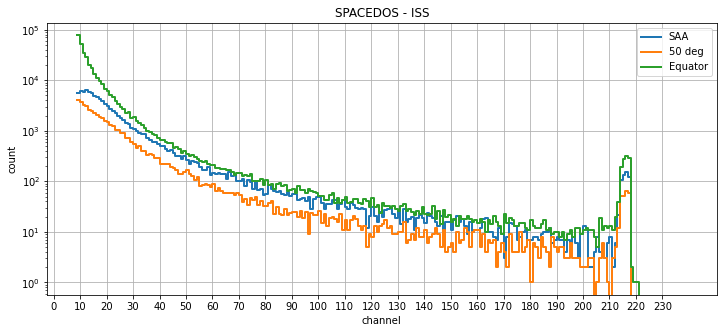

In [441]:
matplotlib.rcParams.update({'font.size': 10})

LOW_ENERGY = 9
HIGH_ENERGY = 240

#rca = rc.iloc[43200:800000].copy()
rca = rcc

LENGTH = 10000
rce = rca.loc[(rca['sum']>500) & (rca['sum']<10000)][:LENGTH]
print(len(rce))
#ener1 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener1 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()
rce = rca.loc[(rca['sum']>80) & (rca['sum']<500)][:LENGTH]
print(len(rce))
#ener2 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener2 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()
rce = rca.loc[(rca['sum']<80)][:LENGTH]
#rce = rc.loc[(rc['sum']>2.0) & (rc['sum']<13)][:LENGTH]
#rce = rc.loc[(rc['sum']>10) & (rc['sum']<80)][:LENGTH]
print(len(rce))
#ener3 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener3 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()


plt.figure(figsize=(12,5))
plt.yscale('log')
#plt.xscale('log')

plt.plot(ener1, label='SAA', lw=2, drawstyle='steps-post')
plt.plot(ener2, label='50 deg', lw=2, drawstyle='steps-post')
plt.plot(ener3, label='Equator', lw=2, drawstyle='steps-post')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('channel')
plt.ylabel('count')
plt.xticks(range(0,240,10))
#plt.xticks(rotation=90)
plt.grid()

0.1 0.038


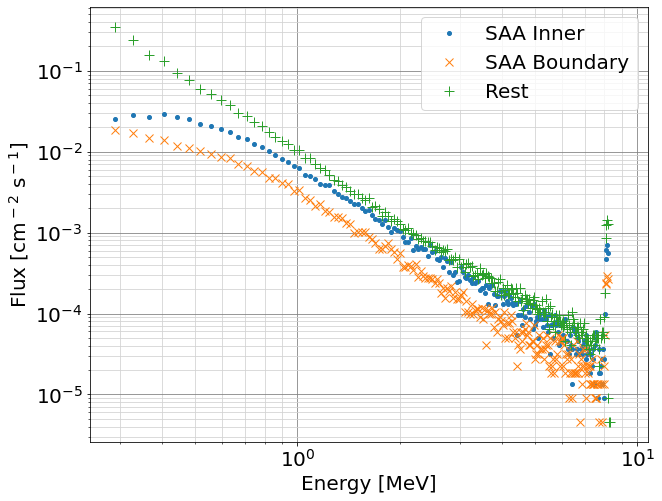

In [443]:
plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-4) * coef[1] + coef[0]

plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'], e['1']/11/2/LENGTH , label='SAA Inner', ms=8, marker='.', drawstyle='steps-post', linestyle='')
plt.plot(e['x'], e['2']/11/2/LENGTH , label='SAA Boundary', ms=8, marker='x', drawstyle='steps-post', linestyle='')
plt.plot(e['x'], e['3']/11/2/LENGTH , label='Rest', ms=10, marker='+', drawstyle='steps-post', linestyle='')

#plt.plot(e['x'], e['1']/11/2/LENGTH , label='SAA Center', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['2']/11/2/LENGTH , label='SAA Edge', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['3']/11/2/LENGTH , label='Equator', lw=2, drawstyle='steps-post', linestyle='-')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()#loc=9)
#plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.ylabel(r'Counts [per 12 hours]')
#plt.xticks(rotation=90)
#plt.grid()
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')


11001


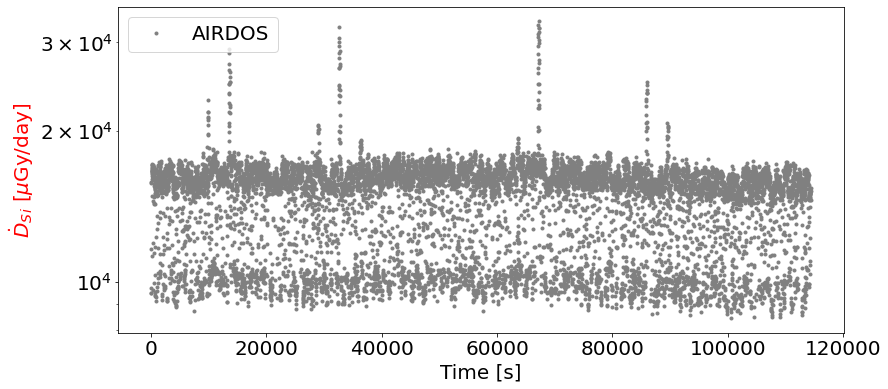

11001


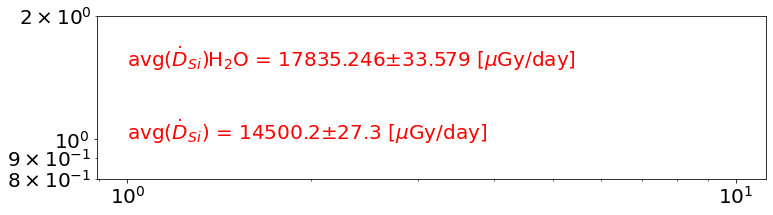

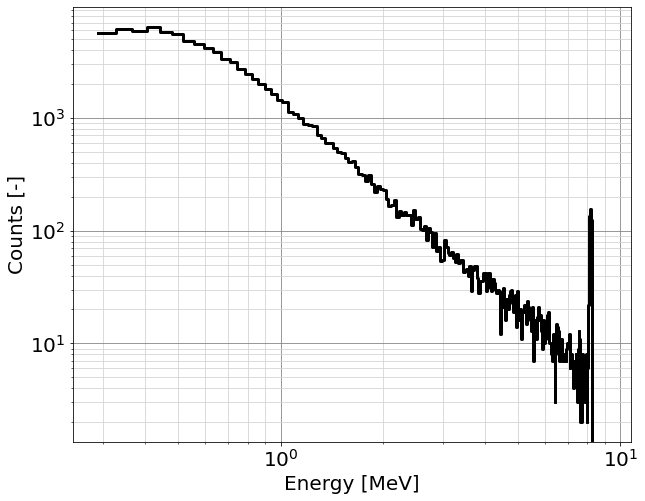

In [444]:
xx = df.copy()

#xx = xx.loc[(xx['sum']>100) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>500) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>100) & (xx['sum']<500)]
#xx = xx.loc[(xx['sum']>10) & (xx['sum']<13)]
print(len(xx))

CHANNELS = 245
NOISE_LEVEL = 7
FROM_ENERGY = 3

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.105 #- 0.038/2
#xx = pd.DataFrame(spectra)
#xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
#xx['date'] = c_all.index
xx['time'] = np.linspace(0, len(xx)*10.4, len(xx))

plt.figure(figsize=(13, 6))

xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 24 # in uGy/day
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))

plt.plot( xx.time, xx['ddsi'], c='gray', linestyle='', marker='.', label='AIRDOS')

#plt.ylim([0,4])
plt.yscale('log')

plt.xlabel('Time [s]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/day]', color='red')
plt.legend(loc=2)

DEATH_TIME = 1

dose = xx
avg_ddsi = round(xx['ddsi'].mean(), 1)
#avg_ddsi_err = round(xx['ddsi'].std(), 1)
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)
sum_dh2o = round(sum_dsi * 1.23,1)
#plt.text(0, 1000, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(0, 100, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(0, 10, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

plt.legend(loc=2)
plt.show()

print(len(xx))

plt.figure(figsize=(12,3))
plt.text(1, 1, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.text(1, 1.5, r'avg($\.D$$_S$$_i$)H$_2$O = '+ str(avg_ddsi*1.23) + '$\pm$' + str(avg_ddsi_err*1.23) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.8,2)
plt.show()

plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'],e['1'], c='black', lw=3, drawstyle='steps-post', label='SPACEDOS')
#plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
#plt.grid()
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')
#plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
#plt.plot(ener,hist)
plt.show()

None

In [448]:
directory = '/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded'

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

df=pd.DataFrame()

sn = '0'
files = sorted(glob.iglob(directory + '/*.TXT'), key=numericalSort)
for file in files:
    print(file)
    l=[]
    l.extend(range(0,254))
    f = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)
    try:
        sn = f.loc[f[0]=='$DOS'].iloc[0,6]
        print("S.N.: ", sn)
    except:
        pass
    df = pd.concat([df,f], ignore_index=True)

#df = df.reset_index(drop=True)
print('All files was readed.')

/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/13.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/14.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/15.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/16.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/17.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/18.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/19.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/20.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/21.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/22.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/23.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/24.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/25.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/shielded/26.TXT
/stora

In [449]:
directory = '/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control'

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

df2=pd.DataFrame()

sn = '0'
files = sorted(glob.iglob(directory + '/*.TXT'), key=numericalSort)
for file in files:
    print(file)
    l=[]
    l.extend(range(0,254))
    f = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)
    try:
        sn = f.loc[f[0]=='$DOS'].iloc[0,6]
        print("S.N.: ", sn)
    except:
        pass
    df2 = pd.concat([df2,f], ignore_index=True)

#df = df.reset_index(drop=True)
print('All files was readed.')

/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/12.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/13.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/14.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/15.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/16.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/17.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/18.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/19.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/20.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/21.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/22.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/23.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/24.TXT
/storage/experiments/2024/03_ISS_SPACEDOS03/processing/control/25.TXT
/storage/experiments

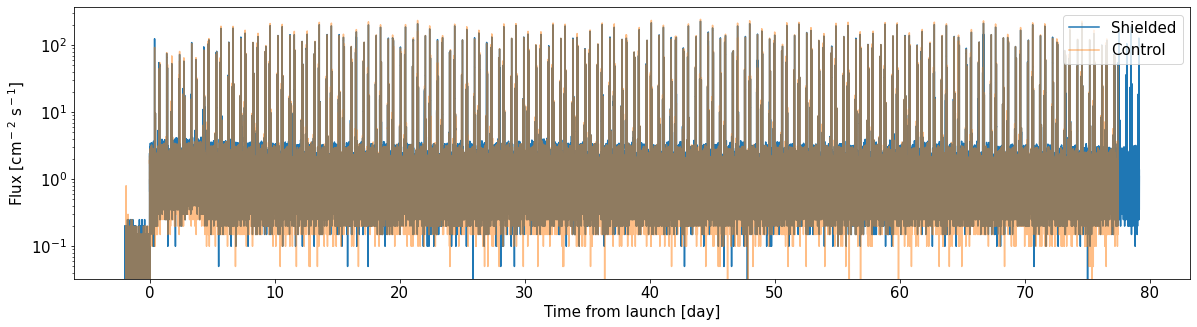

In [632]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

FIRST_CH = 9

df['flux'] = df.iloc[:,FIRST_CH:253].sum(axis=1)/2/10
df['time'] = df[2]-4275747888
df2['flux'] = df2.iloc[:,FIRST_CH:253].sum(axis=1)/2/10
df2['time'] = df2[2]-4275744660
df['day'] = df['time']/60/60/24
df2['day'] = df2['time']/60/60/24

#df['date'] = pd.to_datetime('21 May 2023, 21:37') + pd.to_timedelta(df['time'], unit='s')
#df = df.copy()
#df.set_index(df['date'])

#df2['date'] = pd.to_datetime('21 May 2023, 21:37') + pd.to_timedelta(df2['time'], unit='s')
#df2 = df2.copy()
#df2.set_index(df2['date'])

plt.plot(df['day'],df['flux'], drawstyle='steps-mid', label='Shielded')
plt.plot(df2['day'],df2['flux'], drawstyle='steps-mid', label='Control', alpha=0.5)
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time from launch [day]')

plt.legend(loc=1)

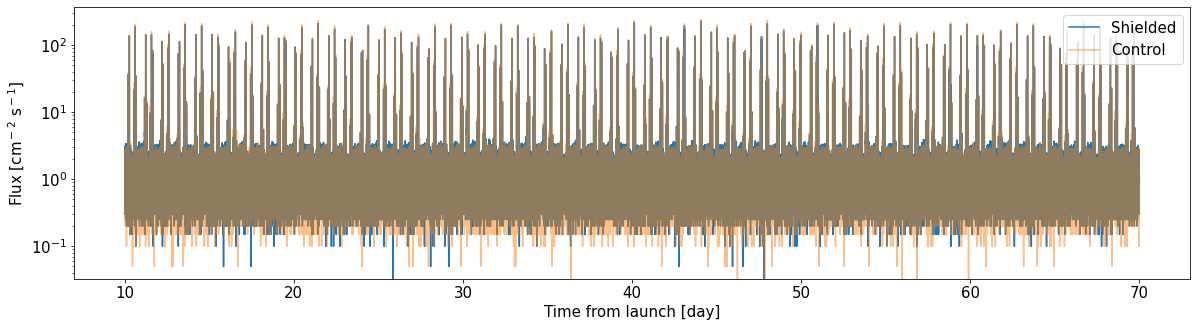

In [633]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

sl = df.loc[df['day']>10]
sl2 = df2.loc[df2['day']>10]

sl = sl.loc[sl['day']<70]
sl2 = sl2.loc[sl2['day']<70]

plt.plot(sl['day'],sl['flux'], drawstyle='steps-mid', label='Shielded')
plt.plot(sl2['day'],sl2['flux'], drawstyle='steps-mid', label='Control', alpha=0.5)
plt.yscale('log')

plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlabel(r'Time from launch [day]')

plt.legend(loc=1)

275286


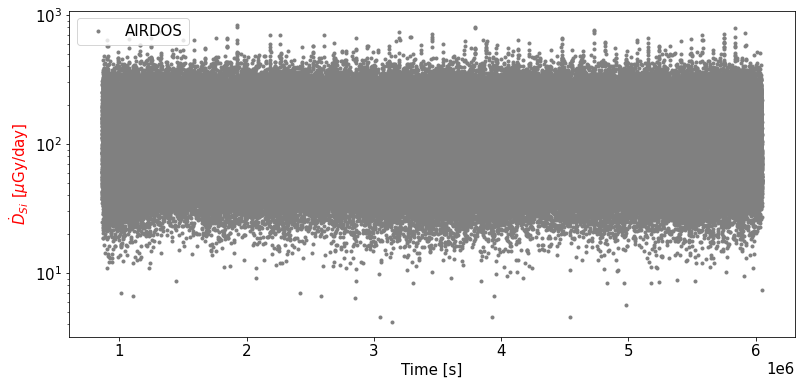

275286


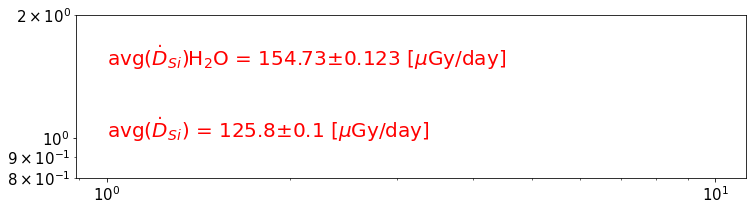

/tmp/ipykernel_30315/3331800515.py:79: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]


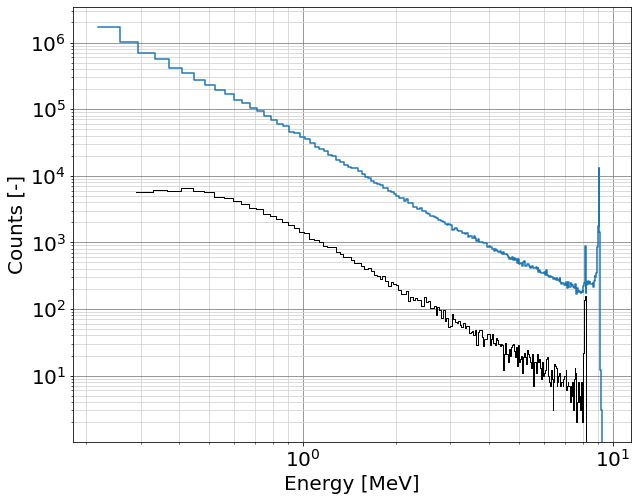

In [553]:
xx = sl2.copy()

#xx = xx.loc[(xx['sum']>100) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>500) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>100) & (xx['sum']<500)]
xx = xx.loc[xx['flux']<2]
print(len(xx))

CHANNELS = 245
NOISE_LEVEL = 8
FROM_ENERGY = 3

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.105 #- 0.038/2
#xx = pd.DataFrame(spectra)
#xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
#xx['date'] = c_all.index
#xx['time'] = np.linspace(0, len(xx)*10.4, len(xx))

plt.figure(figsize=(13, 6))

xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 24 # in uGy/day
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))

plt.plot( xx.time, xx['ddsi'], c='gray', linestyle='', marker='.', label='AIRDOS')

#plt.ylim([0,4])
plt.yscale('log')

plt.xlabel('Time [s]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/day]', color='red')
plt.legend(loc=2)

DEATH_TIME = 1

dose = xx
avg_ddsi = round(xx['ddsi'].mean(), 1)
#avg_ddsi_err = round(xx['ddsi'].std(), 1)
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)
sum_dh2o = round(sum_dsi * 1.23,1)
#plt.text(0, 1000, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(0, 100, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(0, 10, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

plt.legend(loc=2)
plt.show()

print(len(xx))

plt.figure(figsize=(12,3))
plt.text(1, 1, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.text(1, 1.5, r'avg($\.D$$_S$$_i$)H$_2$O = '+ str(round(avg_ddsi*1.23,2)) + '$\pm$' + str(avg_ddsi_err*1.23) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.8,2)
plt.show()

plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'],e['1'], c='black', lw=1, drawstyle='steps-post', label='SPACEDOS')
#plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
#plt.grid()
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')
#plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
plt.plot(ener,hist, drawstyle='steps-post')
plt.show()

None

317200


/tmp/ipykernel_30315/906933137.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hist = xx.sum()[6:250]


318151


/tmp/ipykernel_30315/906933137.py:30: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hist = xx.sum()[6:250]


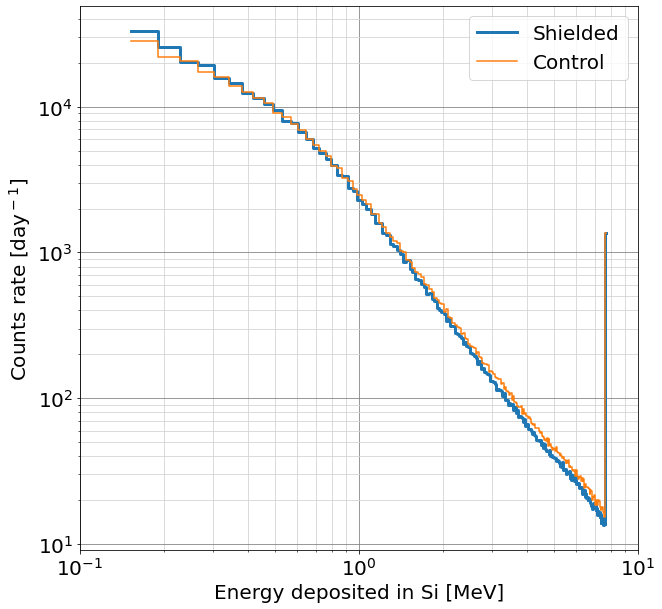

In [705]:
plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size': 20})

xx = sl.copy()
print(len(xx))

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.038

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

hist = xx.sum()[6:250]
hist.iloc[200] = hist.iloc[200:244].sum()
hist.iloc[201:] = np.nan

ener = ee.loc[0:248,'ener']
plt.plot(ener.iloc[3:240],hist.iloc[3:240]/60, lw=3, drawstyle='steps-post', label='Shielded')

xx = sl2.copy()
print(len(xx))

hist = xx.sum()[6:250]
hist.iloc[200] = hist.iloc[220:244].sum()
hist.iloc[201:] = np.nan

plt.plot(ener.iloc[3:240],hist.iloc[3:240]/60, drawstyle='steps-post', label='Control')

plt.legend(loc=1)

None

317200
100738.0
318151
125676.0


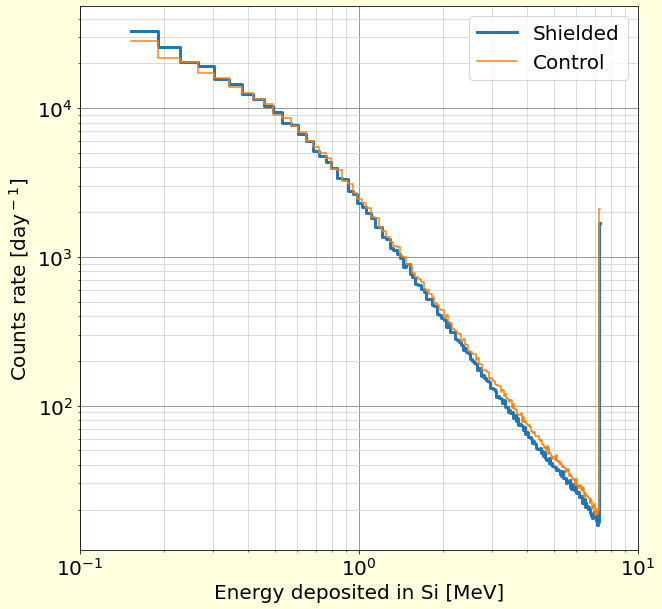

In [681]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})

xx = sl.copy()
print(len(xx))

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.038

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

hist = xx.iloc[:,6:254].sum()
hist.iloc[190] = hist.iloc[180:].sum()
hist.iloc[191:] = np.nan
print(hist.iloc[190])

ener = ee.loc[0:248,'ener']
plt.plot(ener.iloc[3:240],hist.iloc[3:240]/60, lw=3, drawstyle='steps-post', label='Shielded')

xx = sl2.copy()
print(len(xx))

hist = xx.iloc[:,6:254].sum()
hist.iloc[190] = hist.iloc[180:].sum()
hist.iloc[191:] = np.nan
print(hist.iloc[190])

plt.plot(ener.iloc[3:240],hist.iloc[3:240]/60, drawstyle='steps-post', label='Control')

plt.legend(loc=1)

None

Shielded ------------------
length = 317200
over = 1679
ddsi [uGy/h] = 27.4
Control ------------------
length = 318151
over = 2095
ddsi [uGy/h] = 29.0


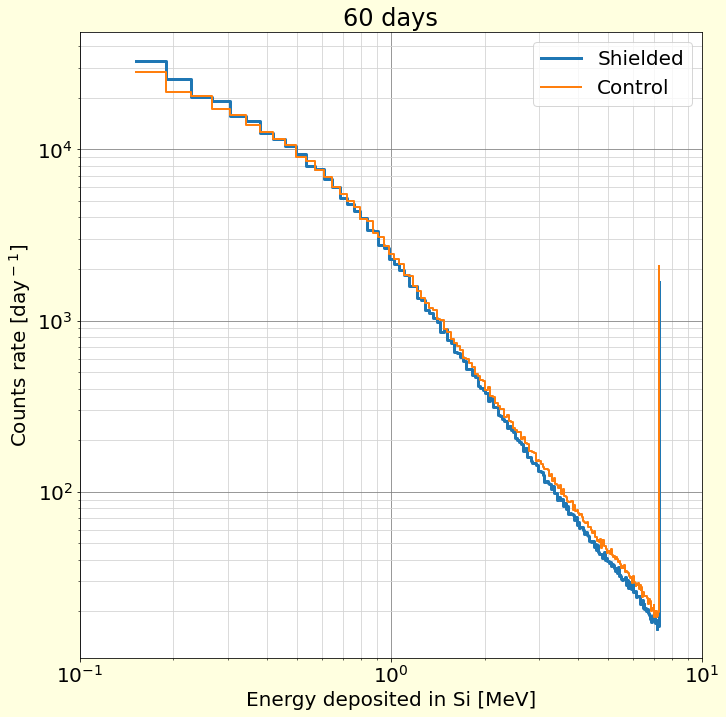

In [800]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})
plt.title('60 days')

print('Shielded ------------------')
xx = sl.copy()
#xx = xx.loc[xx['flux']<2]
print('length =', len(xx))

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.038
ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[180:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# = 0.1398e-3 kg
# Meier DLR: 0.16597 g
# pro 230 um ~ 1.0252e-4 kg
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/integration_time) * 3600 # in uGy/h
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/10) # in uGy/day
print('ddsi [uGy/h] =', round(ddsi,1))

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

plt.plot(ee.loc[3:,'ener'],ee.loc[3:,'cener'], lw=3, drawstyle='steps-post', label='Shielded')

print('Control ------------------')
xx = sl2.copy()
#xx = xx.loc[xx['flux']<2]
print('length =', len(xx))

ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[180:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/10) # in uGy/day
print('ddsi [uGy/h] =', round(ddsi,1))

plt.plot(ee.loc[3:,'ener'],ee.loc[3:,'cener'], lw=2, drawstyle='steps-post', label='Control')

plt.legend(loc=1)

None

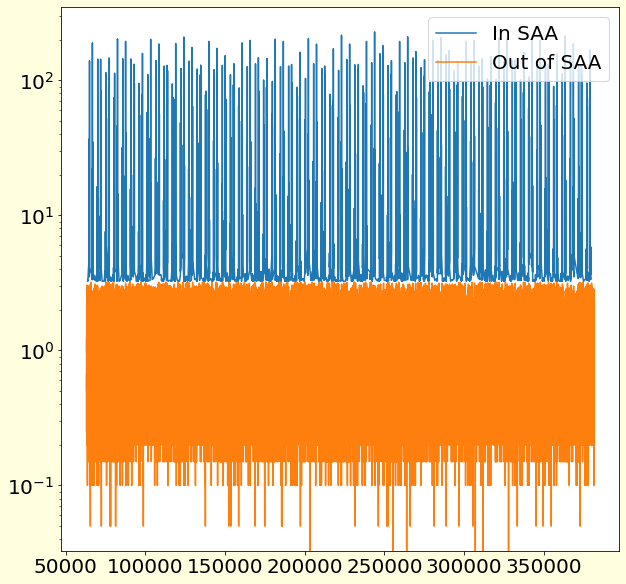

Shielded ------------------
11488
over = 1029
ddsi [uGy/h] = 17.7
Control ------------------
11156
over = 1393
ddsi [uGy/h] = 19.9


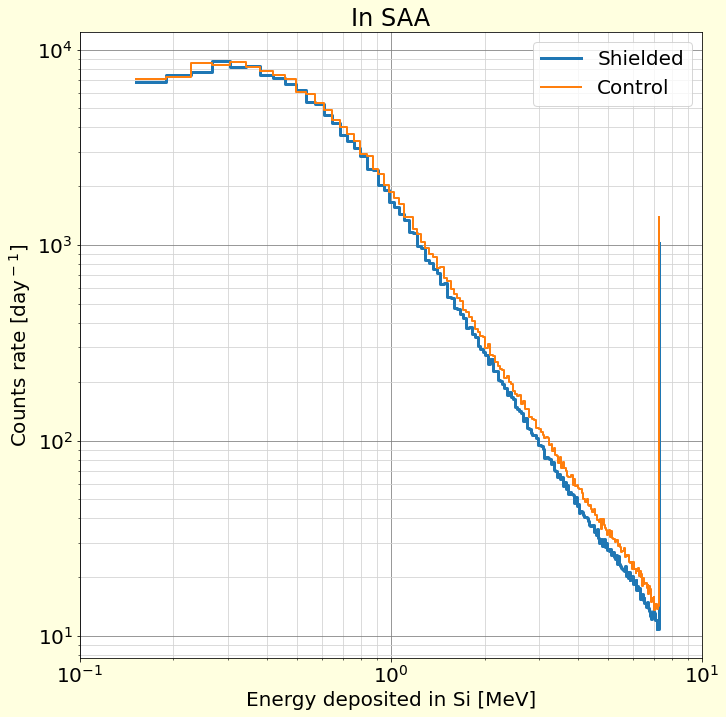

Shielded ------------------
305712
over = 649
ddsi [uGy/h] = 9.7
Control ------------------
306995
over = 702
ddsi [uGy/h] = 9.1


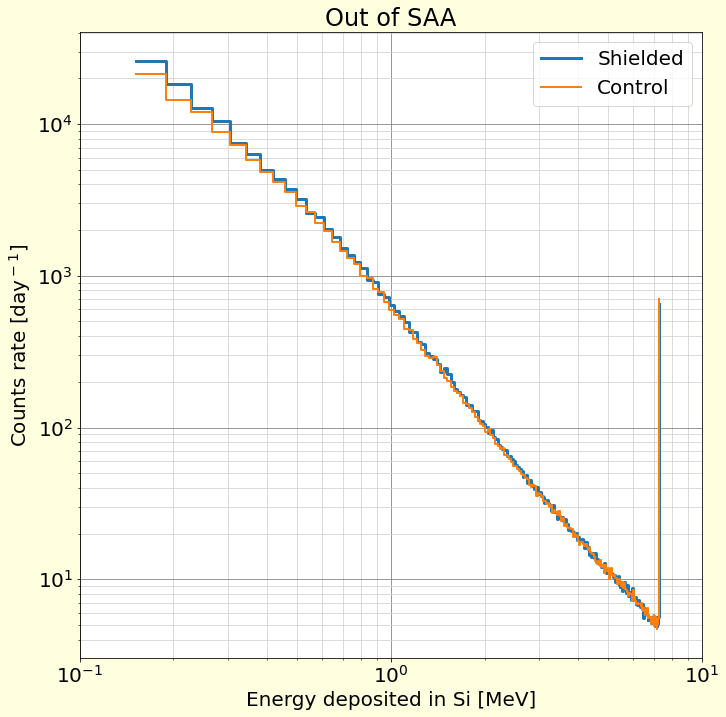

In [804]:
THRESHOLD = 3.2

plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})

plt.plot(sl['flux'].loc[sl['flux']>THRESHOLD], label='In SAA')
plt.plot(sl2['flux'].loc[sl2['flux']<=THRESHOLD], label='Out of SAA')
plt.legend(loc=1)
plt.yscale('log')
plt.show()
         
plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})
plt.title('In SAA')
plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
#plt.ylim(0,2500)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

xx = sl.copy()
xx = xx.loc[xx['flux']>THRESHOLD]
print('Shielded ------------------')

print(len(xx))

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.038
ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[180:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/10) # in uGy/day
print('ddsi [uGy/h] =', round(ddsi,1))

plt.plot(ee.loc[3:,'ener'],ee.loc[3:,'cener'], lw=3, drawstyle='steps-post', label='Shielded')

xx = sl2.copy()
xx = xx.loc[xx['flux']>THRESHOLD]
print('Control ------------------')
print(len(xx))

ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[180:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/10) # in uGy/day
print('ddsi [uGy/h] =', round(ddsi,1))

plt.plot(ee.loc[3:,'ener'],ee.loc[3:,'cener'], lw=2, drawstyle='steps-post', label='Control')

plt.legend(loc=1)
plt.show()

plt.figure(figsize=(10,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 20})
plt.title('Out of SAA')
plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,10)
#plt.ylim(0,2500)
plt.xlabel('Energy deposited in Si [MeV]')
plt.ylabel('Counts rate [day$^-$$^1$]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

xx = sl.copy()
xx = xx.loc[xx['flux']<=THRESHOLD]
print('Shielded ------------------')
print(len(xx))

ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[180:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/10) # in uGy/day
print('ddsi [uGy/h] =', round(ddsi,1))

plt.plot(ee.loc[3:,'ener'],ee.loc[3:,'cener'], lw=3, drawstyle='steps-post', label='Shielded')

xx = sl2.copy()
xx = xx.loc[xx['flux']<=THRESHOLD]
print('Control ------------------')
print(len(xx))

ee['cener'] = (xx.iloc[:,6:254].sum()/60).reset_index(drop=True) # counts per day
ee.loc[190,'cener'] = ee.loc[180:,'cener'].sum()
ee.loc[191:,'cener'] = np.nan
print('over =', int(round(ee.loc[190,'cener'],0)))
ee['dener'] = ee['ener'] * ee['cener']
ddsi = ((1e6 * (1.602e-19 * ee.loc[3:,'dener'].sum() * 1e6)/1.0252e-4)/10) # in uGy/day
print('ddsi [uGy/h] =', round(ddsi,1))

plt.plot(ee.loc[3:,'ener'],ee.loc[3:,'cener'], lw=2, drawstyle='steps-post', label='Control')

plt.legend(loc=1)
plt.show()

None

In [698]:
ener

0      0.038
1      0.076
2      0.114
3      0.152
4      0.190
       ...  
244    9.310
245    9.348
246    9.386
247    9.424
248    9.462
Name: ener, Length: 249, dtype: float64